# **COVID-19 EDAReport**

**Dataset:** The dataset is collected from the World Health Organization (WHO) website. It contains daily reported COVID-19 cases and deaths for each country and WHO region, covering the period from 4 January 2020 to 3 August 2025. The dataset contains 8 fileds with more the 450K tuples.

WHO stopped requiring daily basis data reporting since August 2023 and the data presented in this dashboard are weekly frequency. However, a few number of countries continues to report at daily frequency which will be updated in this release and Users can find the data at daily granularity mainly for early years of the pandemic in this statistical release.

Dataset: https://data.who.int/dashboards/covid19/data

**Objective:** The objective of this project is to analyze the COVID-19 dataset to understand its global impact. The project aims to identify the most affected countries, the countries with the highest deaths, and the countries that remained relatively safer. It also focuses on studying the trends of cases and deaths over time and comparing the impact across different WHO regions.

In [1]:
# Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset and chect it structure
df=pd.read_excel('COVID-19 Dataset.xlsx')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [3]:
# Check the Shape of the dataset 
print(f'The Number of Columns are: {df.shape[1]}')
print('AND')
print(f'The Number of Rows are: {df.shape[0]}')

The Number of Columns are: 8
AND
The Number of Rows are: 489360


# **Data Cleaning and Transformation**

In [4]:
# Check the Null Values
df.isnull().sum()

Date_reported             0
Country_code           2039
Country                   0
WHO_region                0
New_cases            279022
Cumulative_cases          0
New_deaths           335385
Cumulative_deaths         0
dtype: int64

**Handling Missing Values:**
In the dataset, the missing values in New_cases and New_deaths mean that no cases or deaths were reported on those days, so we will fill them with zero (0). Also, since the Country column has no missing values, the Country_code column is not important for the analysis, so we will drop it.

In [5]:
df.fillna({'New_cases':0,'New_deaths':0},inplace=True)
df.drop(columns=['Country_code'],inplace=True)

In [6]:
# Check the Number of Duplicates Row
print(f'The Number of Duplicates Row is: {df.duplicated().sum()}')

The Number of Duplicates Row is: 0


In [7]:
# Check the Descriptive Statistics 
df.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,489360,4.893600e+05,4.893600e+05,489360.000000,4.893600e+05
mean,2022-10-19 00:00:00,1.590801e+03,2.044598e+06,14.426426,2.167556e+04
min,2020-01-04 00:00:00,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,2021-05-27 00:00:00,0.000000e+00,6.602000e+03,0.000000,4.000000e+01
50%,2022-10-19 00:00:00,0.000000e+00,5.950200e+04,0.000000,6.900000e+02
75%,2024-03-12 00:00:00,2.700000e+01,6.609370e+05,0.000000,7.942000e+03
max,2025-08-03 00:00:00,6.966046e+06,1.034368e+08,11447.000000,1.226130e+06
std,NaN,3.189202e+04,8.522921e+06,122.519692,8.681120e+04


New_cases and New_deaths initially contain negative values. Since counts cannot be negative, we are replacing all negative entries with 0 while keeping positive values unchanged.

In [8]:
df['New_cases'] = df['New_cases'].clip(lower=0)
df['New_deaths'] = df['New_deaths'].clip(lower=0)

In [9]:
# Check the Data type of all Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489360 entries, 0 to 489359
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      489360 non-null  datetime64[ns]
 1   Country            489360 non-null  object        
 2   WHO_region         489360 non-null  object        
 3   New_cases          489360 non-null  float64       
 4   Cumulative_cases   489360 non-null  int64         
 5   New_deaths         489360 non-null  float64       
 6   Cumulative_deaths  489360 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 26.1+ MB


In [10]:
# Convert the data type of 'Date_reported' to datetime and 'New_cases' & 'New_deaths' to integer
df['Date_reported']=pd.to_datetime(df['Date_reported'])
df['New_cases']=df['New_cases'].astype('int')
df['New_deaths']=df['New_deaths'].astype('int')

In [11]:
# Now Again check the data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489360 entries, 0 to 489359
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      489360 non-null  datetime64[ns]
 1   Country            489360 non-null  object        
 2   WHO_region         489360 non-null  object        
 3   New_cases          489360 non-null  int32         
 4   Cumulative_cases   489360 non-null  int64         
 5   New_deaths         489360 non-null  int32         
 6   Cumulative_deaths  489360 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(2)
memory usage: 22.4+ MB


**Data types converted successfully**

In [12]:
# Check the Unique Value of 'Country' and 'WHO Region'.
df[['Country','WHO_region']].nunique()

Country       240
WHO_region      7
dtype: int64

In [13]:
# Group the data by Country, Region and Date
country=df.groupby('Country',as_index=False)[['New_cases','New_deaths']].sum()
region=df.groupby('WHO_region',as_index=False)[['New_cases','New_deaths']].sum()
by_dates=df.groupby('Date_reported',as_index=False)[['New_cases','New_deaths']].sum()

# Total COVID-19 Cases, Deaths and Death ratio

In [14]:
total_cases = df['New_cases'].sum()
total_deaths = df['New_deaths'].sum()
death_ratio = (total_deaths / total_cases) * 100
print(f"Total COVID-19 case records in the dataset: {total_cases:,}")
print(f"Total COVID-19 death records in the dataset: {total_deaths:,}")
print(f"COVID-19 death ratio: {death_ratio:.2f}%")

Total COVID-19 case records in the dataset: 778,555,963
Total COVID-19 death records in the dataset: 7,066,337
COVID-19 death ratio: 0.91%


# The Date With the Highest Recorded COVID-19 Cases

In [15]:
by_dates.loc[by_dates['New_cases'].idxmax()]

Date_reported    2022-01-30 00:00:00
New_cases                    8401963
New_deaths                     17569
Name: 757, dtype: object

On 30 January 2022, the highest number of daily COVID-19 cases (8,401,963 cases) was recorded, indicating a major surge in infections and highlighting the need for strong public health measures.

# The Date With the Highest Recorded COVID-19 Deaths

In [16]:
by_dates.loc[by_dates['New_deaths'].idxmax()]

Date_reported    2021-01-24 00:00:00
New_cases                    1155154
New_deaths                     27939
Name: 386, dtype: object

On 24 January 2021, the dataset records 27,939 COVID-19 deaths, marking the highest number of daily deaths in this dataset. This highlights a significant surge in fatalities on that day and underscores the continued impact of the pandemic.

# Countries with No Reported COVID-19 Cases

In [17]:
country[country['New_cases']==0][['Country','New_cases']].reset_index(drop=True)

,Country,New_cases
0,Democratic People's Republic of Korea,0
1,Turkmenistan,0


# Countries with No Reported COVID-19 Deaths

In [18]:
country[country['New_deaths']==0][['Country','New_deaths']].reset_index(drop=True)

,Country,New_deaths
0,Democratic People's Republic of Korea,0
1,Falkland Islands (Malvinas),0
2,Holy See,0
3,International commercial vessel,0
4,International conveyance (American Samoa),0
5,International conveyance (Kiribati),0
6,International conveyance (Solomon Islands),0
7,International conveyance (Vanuatu),0
8,Niue,0
9,Pitcairn,0


# Trend of COVID-19 Cases Over Time

In [19]:
sns.set_theme(
    style="whitegrid",palette="winter_r",font_scale=1.1)


# Change to Y-Axis in Million
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{x/1_000_000:.1f}M'

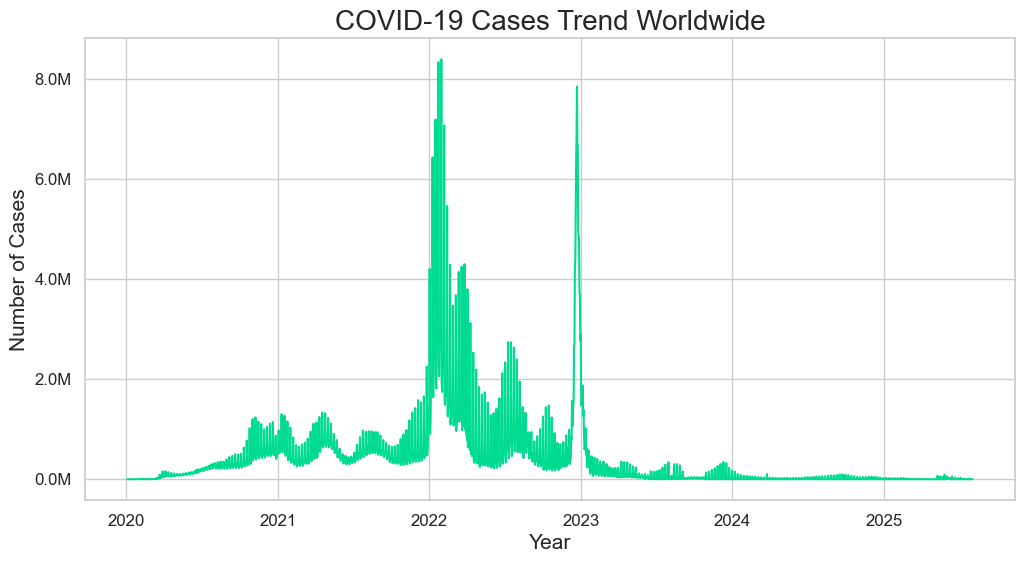

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date_reported',y='New_cases',data=by_dates)
plt.title("COVID-19 Cases Trend Worldwide", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

**Insight:** COVID-19 cases started in mid-2020 and increased slowly. In early 2022, cases rose quickly and crossed 8 million. After that, they decreased but again went up near the end of 2022, reaching around 8 million before finally slowing down and coming under control.

# Trend of COVID-19 Deaths Over Time

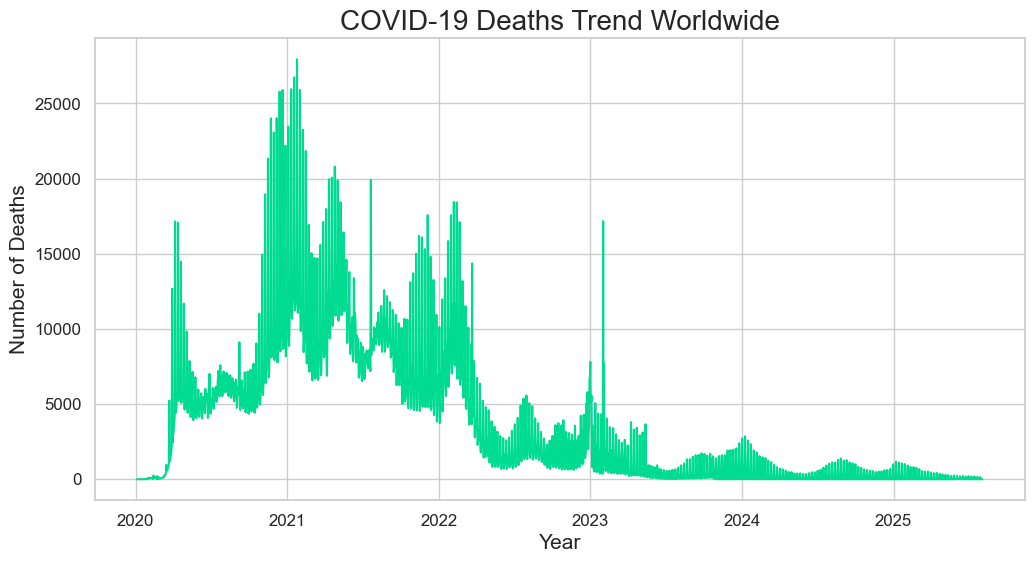

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date_reported',y='New_deaths',data=by_dates)
plt.title('COVID-19 Deaths Trend Worldwide',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
plt.show()

**Insight:** Daily COVID-19 deaths peaked dramatically in 2020-2022 but then fell sharply and have remained low since 2023, showing the pandemic's transition to a manageable endemic phase.

# Top 10 Countries with the Highest Reported COVID-19 Cases

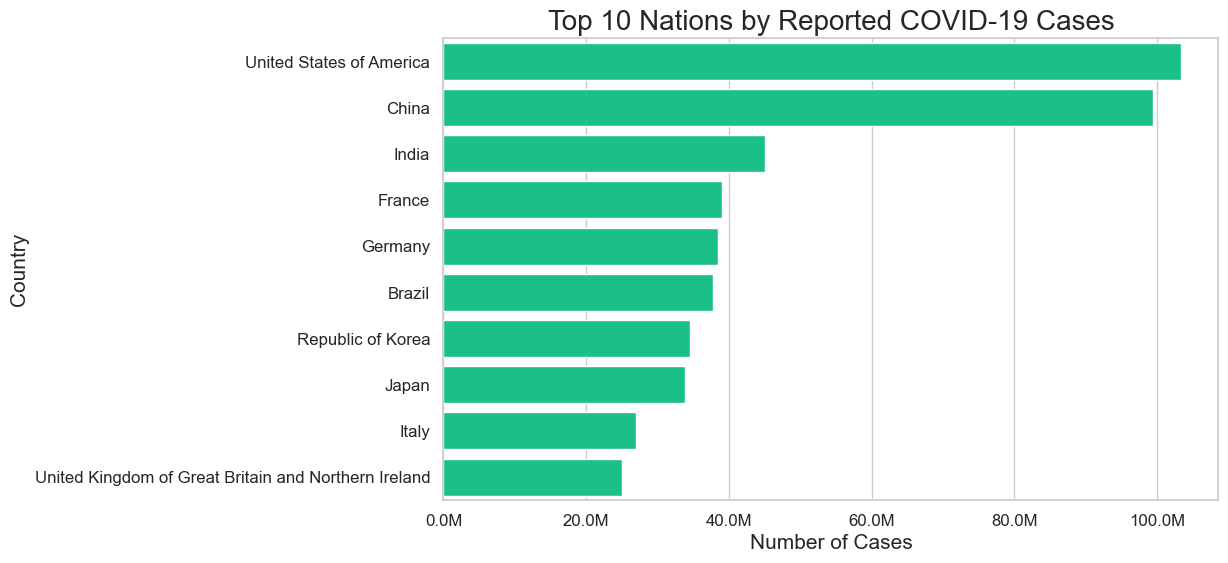

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='New_cases',y='Country',data=country.sort_values(by='New_cases',ascending=False).head(10))
plt.title("Top 10 Nations by Reported COVID-19 Cases", fontsize=20)
plt.xlabel("Number of Cases", fontsize=15)
plt.ylabel("Country", fontsize=15)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

**Insight:** The USA has reported the highest number of COVID-19 cases, crossing 100 million. China follows with around 100 million cases, while all other countries have reported less than 50 million cases.

# Top 10 Countries with the Highest Reported COVID-19 Deaths

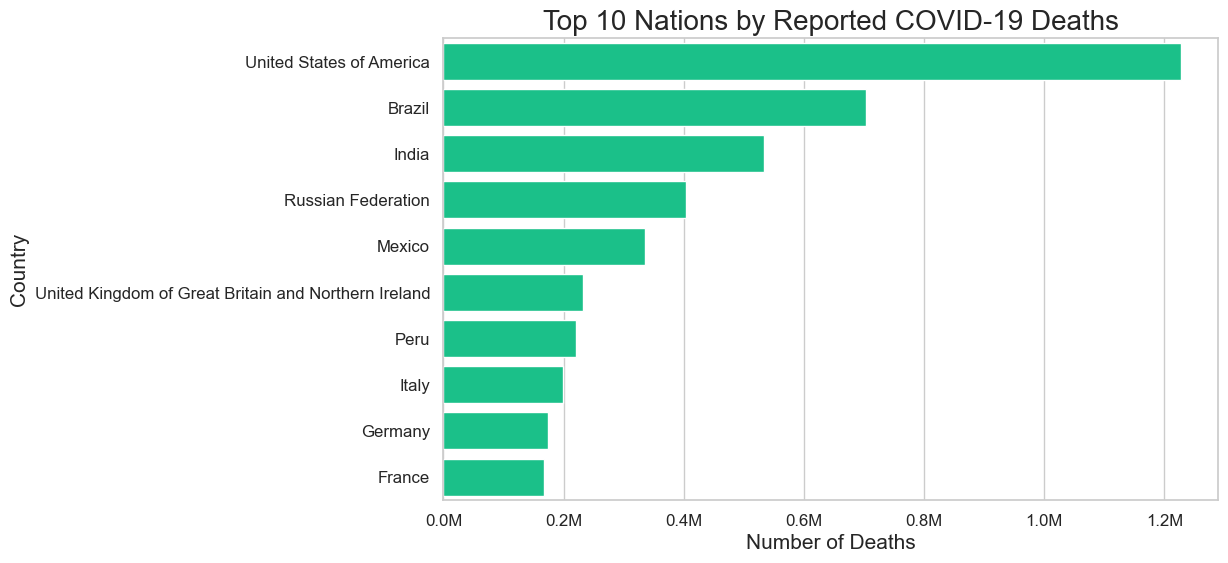

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='New_deaths',y='Country',data=country.sort_values(by='New_deaths',ascending=False).head(10))
plt.title("Top 10 Nations by Reported COVID-19 Deaths", fontsize=20)
plt.xlabel("Number of Deaths", fontsize=15)
plt.ylabel("Country", fontsize=15)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

**Insight:** The USA recorded over 1.2 million COVID-19 deaths, Brazil around 0.7 million, and India more than 0.5 million, while other countries reported fewer than 0.5 million deaths.

# Top 10 Countries with the Highest COVID-19 Death Ratio

In [24]:
ratio_country=country.copy()
ratio_country['death_ratio']=(ratio_country['New_deaths']/ratio_country['New_cases'])*100

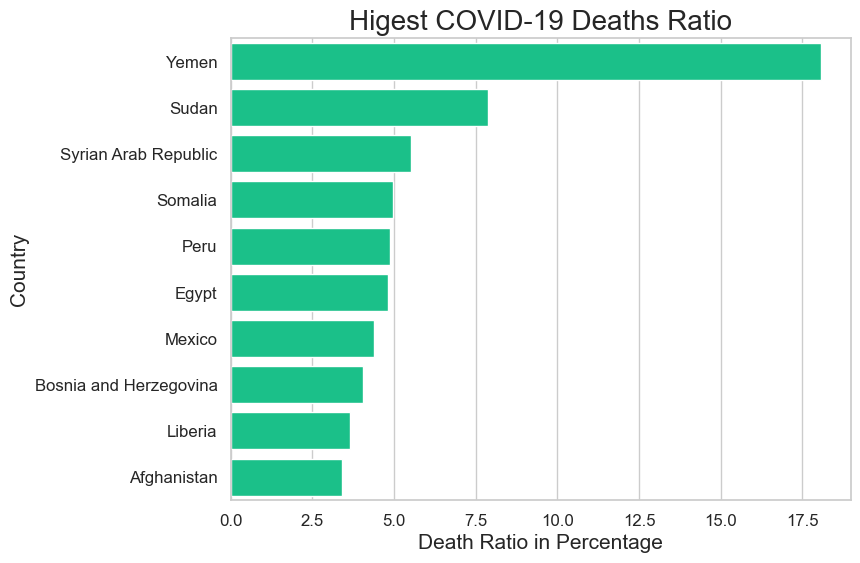

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='death_ratio',y='Country',data=ratio_country.sort_values(by='death_ratio',ascending=False).head(10))
plt.title('Higest COVID-19 Deaths Ratio',fontsize=20)
plt.xlabel('Death Ratio in Percentage',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.show()

**Insight:** Yemen has the highest COVID-19 death ratio at 18%, followed by Sudan at 7.8% and Syrian Arab Republic above 5.5%, while all other countries remain below 5%

# World Health Organization (WHO) Region-wise COVID-19 Cases

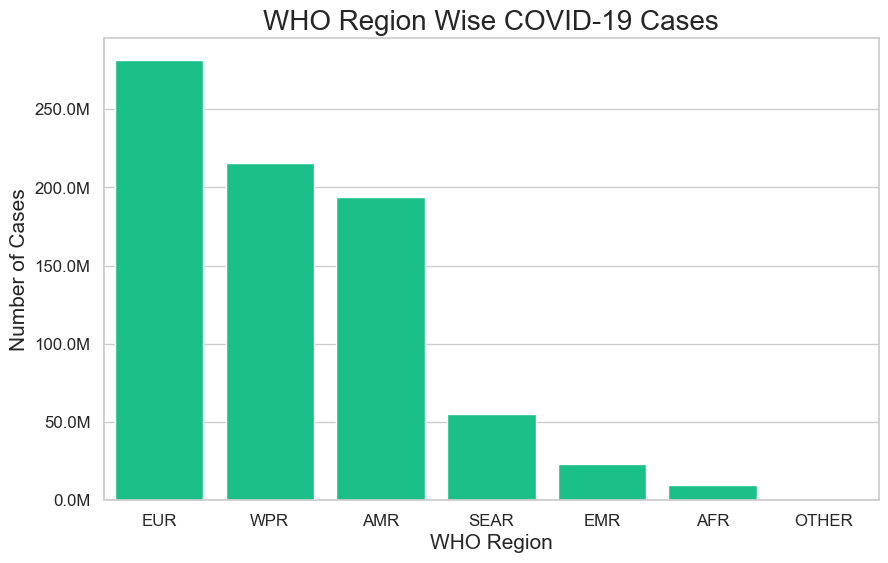

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='WHO_region',y='New_cases',data=region.sort_values(by='New_cases',ascending=False))
plt.title('WHO Region Wise COVID-19 Cases',fontsize=20)
plt.xlabel('WHO Region',fontsize=15)
plt.ylabel('Number of Cases',fontsize=15)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

**Insight:** The European region (EUR) recorded the highest number of COVID-19 cases with around 280 million. The Western Pacific Region (WPR) follows with about 200 million cases, while the Americas (AMR) also reported close to 200 million, while other WHO regions recorded less than 60 million cases, and the 'Other' section shows cases that are almost negligible.

# World Health Organization (WHO) Region-wise COVID-19 Deaths

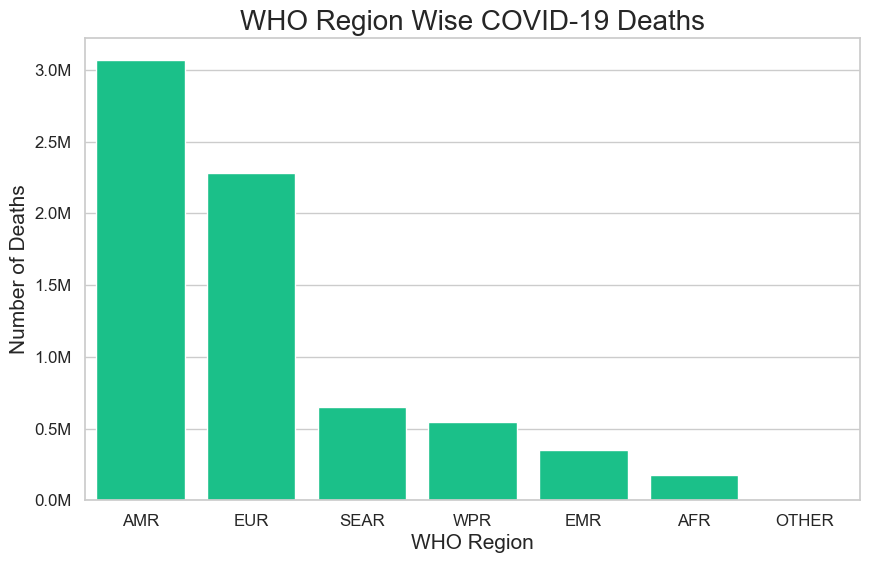

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='WHO_region',y='New_deaths',data=region.sort_values(by='New_deaths',ascending=False))
plt.title('WHO Region Wise COVID-19 Deaths',fontsize=20)
plt.xlabel('WHO Region',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

**Insight:** The Americas (AMR) recorded the highest number of COVID-19 deaths, with around 3 million. Europe (EUR) follows with about 2.2 million deaths, while other WHO regions reported fewer than 0.6 million deaths, while the 'Other' section shows deaths that are almost negligible.

# WHO Regions with Death Ratio

In [28]:
region['death_ratio']=(region['New_deaths']/region['New_cases'])*100

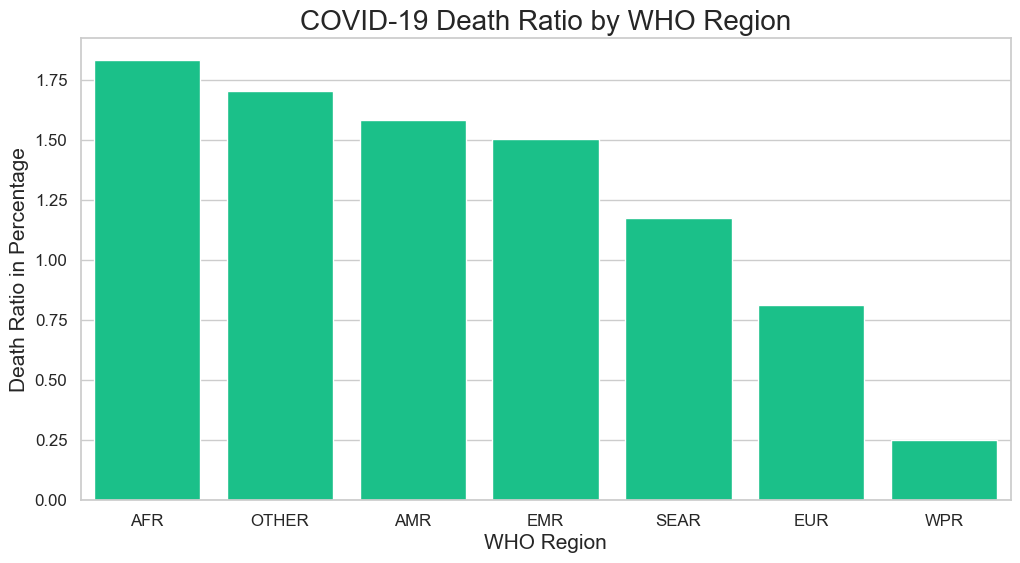

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(y='death_ratio', x='WHO_region',data=region.sort_values(by='death_ratio',ascending=False))
plt.title('COVID-19 Death Ratio by WHO Region',fontsize=20)
plt.xlabel('WHO Region',fontsize=15)
plt.ylabel('Death Ratio in Percentage',fontsize=15)
plt.show()

**Insight:** The COVID-19 death ratio varies across WHO regions. AFR (Africa) has the highest death ratio, followed by OTHER, AMR (Americas), and EMR (Eastern Mediterranean). SEAR (South-East Asia) and EUR (Europe) have moderate death ratios, while WPR (Western Pacific) has the lowest. This indicates significant regional differences in COVID-19 mortality rates.

# Regional Contribution to Total COVID-19 Cases

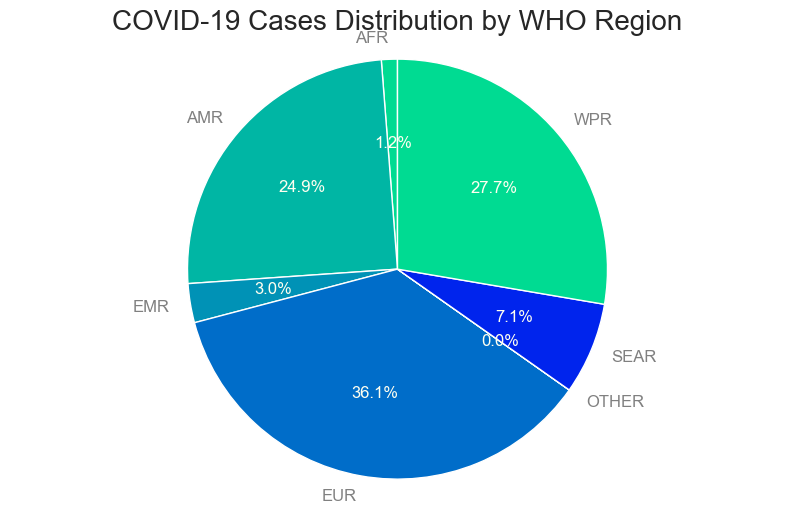

In [30]:
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(region['New_cases'],labels=region['WHO_region'],autopct='%1.1f%%',startangle=90)
plt.setp(texts, color='gray', fontsize=12)
plt.setp(autotexts, color='Ivory', fontsize=12)
plt.title("COVID-19 Cases Distribution by WHO Region",fontsize=20)
plt.axis('equal')
plt.show()

**Insight:** Out of the total COVID-19 cases, the EUR region accounts for the highest share at 36.1%, followed by WPR with 27.7% and AMR with 24.9%. The remaining regions, SEAR, EMR, and AFR, contribute only a minor portion of the total cases. The 'Other' category records 0% of the total cases.

# Regional Contribution to Total COVID-19 Deaths

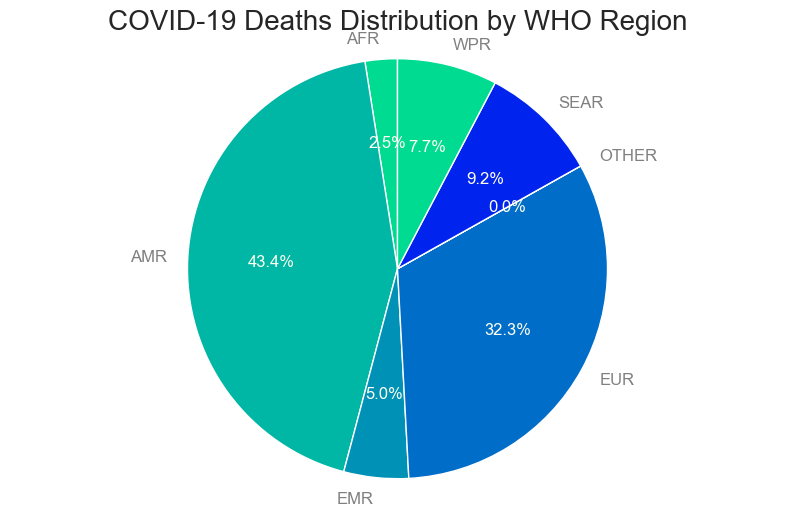

In [31]:
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(region['New_deaths'],labels=region['WHO_region'],autopct='%1.1f%%',startangle=90)
plt.setp(texts, color='gray', fontsize=12)
plt.setp(autotexts, color='Ivory', fontsize=12)
plt.title("COVID-19 Deaths Distribution by WHO Region",fontsize=20)
plt.axis('equal')
plt.show()

**Insight:** Out of the total COVID-19 deaths, the AMR region accounts for the highest share at 43.4%, followed by WPR with 32.3%. The remaining regions SEAR, WPR, EMR, and AFR contribute only a minor portion of the total deaths. The 'Other' category records 0% of the total deaths.

# Conclusion
- The analysis reveals that the USA experienced the highest number of COVID-19 cases as well as deaths. 
- On a regional level, Europe reported the most cases, while the Americas accounted for the highest number of deaths.
- The total number of cases in the dataset is 778,555,963, with 7,066,337 deaths, resulting in a death ratio of 0.91%.
- Notably, some countries such as the Democratic People's Republic of Korea and Turkmenistan reported no COVID-19 cases, and a total of 13 countries reported no deaths, including Democratic People's Republic of Korea, Saint Helena, and Turkmenistan.
- The highest death ratio is observed in Yemen at 18%, highlighting the severe impact in certain regions. These insights underscore the unequal global distribution of COVID-19 impact across countries and regions.